<img style="float: right;width: 100px" src="https://www.enib.fr/images/logo-enib-accueil.jpg">

# Electronique S4 
# prise en main des fonctions scipy permettant l'étude des filtres ordre n


In [1]:
%matplotlib inline 
from numpy import *
from matplotlib.pyplot import *
import scipy.signal as sig
import lib_electronic_V3 as lib
import warnings
warnings.filterwarnings('ignore')

## definition du gabarit passe bas recherché
On recherche un filtre permettant de laisser passer les signaux jusqu'à 2kHz avec une bande passante de 3dB puis de les atténuer d'au moins 80dB à partir de 10kHz

### définitions des valeurs permettant de tracer le gabarit

In [2]:
fc = 2000
fs = 10000
T0 = 1
Gc = 3
Gs = 80
Tc = 10**(-Gc/20)
Ts = 10**(-Gs/20)
print( "Tc (naturel)=", Tc, "Ts (naturel) =", Ts)
print("bande passante (dB)=", Gc, "attenuation min dans stop band (dB) =", Gs)

Tc (naturel)= 0.7079457843841379 Ts (naturel) = 0.0001
bande passante (dB)= 3 attenuation min dans stop band (dB) = 80


### Calcul de l'ordre min du filtre permettant de passer la courbe de module dans le gabarit

In [3]:
N= 2

### Tracé du gabarit
une bibliotheque est fournie

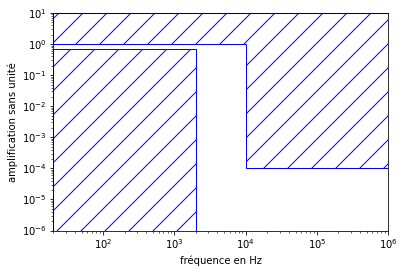

In [4]:
lib.draw_prototype(fc,Tc,fs,Ts,filter_type="lowpass",xaxes_type="f", yaxes_type = "T")


## normalisation des données pour utilisation des fonctions scipy et travail sur polynomes normalisés

In [5]:
wc =1
#pour la fonction elliptique (filtres de Cauer) l'ordre et la pulsation sont à calculer différement
Nc =

wcc=


SyntaxError: invalid syntax (<ipython-input-5-c6e9d665625e>, line 3)

## Tracé du gabarit normalisé¶

## definition des systèmes linéaires normalisés en utilisant les approximations
Plusieurs approximations des polynomes dénominateurs permettent de rentrer dans le gabarit demandé.
Des fonctions définies dans la bibliothèques scipy sont utilisées : 
* butter : https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
* cheby1 (ondulation dans la bande passante et non dans la bande coupée) : https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby1.html
* bessel : https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bessel.html
* ellip pour les filtres de Cauer encore appelés filtres elliptiques : https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ellip.html
Lire la documentation et vérfier le bon paramétrage des fonctions appelées ci dessous

In [ ]:
[z1,p1,k1] = sig.butter(N,wc,btype='low',analog=True,output='zpk')
H_butter=sig.lti(z1,p1,k1)
[z2,p2,k2] = sig.cheby1(N,np.abs(Gc),wc,btype='low',analog=True,output='zpk')
H_cheby = sig.lti(z2,p2,k2)
# filtre bessel optimisé pour respecter la pulsation de cassure à -3dB - paramètre norm = 'mag'
[z3,p3,k3]= sig.bessel(N, wc, btype='low',analog=True,norm = 'mag', output='zpk')
H_bessel = sig.lti(z3,p3,k3)
# filtre bessel optimisé pour respecter la linéarité de phase autour de wC- paramètre norm = 'phase'
[z3phi,p3phi,k3phi] = sig.bessel(N, wc, btype='low',analog=True,norm = 'phase', output='zpk')
H_bessel_phi = sig.lti(z3phi,p3phi,k3phi)
# filtre bessel optimisé pour respecter la temps de propagation de groupe en 1/wC- paramètre norm
[z3delay,p3delay,k3delay] = sig.bessel(N, wc, btype='low',analog=True,norm = 'delay', output='zpk')
H_bessel_tps = sig.lti(z3delay,p3delay,k3delay)
#filtre cauer avec ordre spécifique
[z4,p4,k4] = sig.ellip(Nc,np.abs(Gc),np.abs(Gs),wcc,btype='low',analog=True,output='zpk')
H_cauer = sig.lti(z4,p4,k4)

## Diagramme des pôles et zéros sur axes normalisés par rapport à wc
générer les pôles de chacun des systemes lti définis.
on rappelle que les atributs .poles et .zeros sont directement définis pour la classe lti
Représenter ensuite tous les pôles dans le même repère et retrouver les propriétés de chacune des approximations

### représentation dénormalisée (axes en rad/s)
Revenir au diagramme sur repère en rad/s

## Création des polynomes numérateurs et dénominateurs normalisés
PLusieurs options permettent de renvoyer les pôles, zéros et le gain (coefficient amplificateur du numérateur) d'un systeme lti ou les coefficients de son numérateurs et son dénominateurles systemes lti )...

# Diagrammes de Bode
Trouver dans la bibliothèque fournie les fonction permettant d'afficher les diagrammes de Bode des différents systèmes lti définis plus haut

### zoom auour de f/fc=1

# reponses indicielles

In [ ]:
t_e = arange(0,70/wc,0.00001)
[t_1, imp_1] = H_butter.step(T=t_e)


### analyse plus spécifique des extrema pour chebishev


* pulsations propre et coefficients d'amortissement des différentes paires de pôles

* fréquences de résonance des cellules

* fréquences des extrema de la courbe de module dans la bande passante

# etude des polynomes-extraction des racines
vous présenterez ici les polynomes normalisés factorisés en terme d'ordre 2 et 1 et les couples FSF et Q de chaque cellule correspondante.
Vous pourrez vérifier que les pôle dénormalisés donnent bien des couples m et w0 cohérents.

* Butterworth

In [ ]:
print("coefficients du dénominateur de Butterworth", den1)
r1=.roots(den1)
print("racines du dénominateur",r1)
r1_norm = r1/wc
print("racines normalisées par rapport à wC",r1_norm)




* Chebyshev